<a href="https://colab.research.google.com/github/jaywanjohi/co-rise/blob/main/Juliet_Wanjohi_Week_3_Building_SOTA_Supervised_Learning_Models_QUESTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> DUPLICATE THIS COLAB TO START WORKING ON IT. Using File > Save a copy to drive.

# Week 3: Building State-of-the-art Supervised Learning Models

In this project, we will be building more advanced supervised learning models to solve Kaggle challenges, where you can compare your models to a community leader board. Unlike previous weeks, this assignment will be more open-ended and provide you more opportunity to try new and creative approaches to building better performing models. This is representative of the research cycle, where you can put some of the things you have learned so far to practice. Use discussion with your peers and the teaching staff to help guide your thinking. Remember to always frame your work in terms of build-measure-learn thinking so you can be clear on what you're trying and why. 


### Instructions

1. We provide starter code and a selection of Kaggle datasets below as a scaffold. Although a lot of the assignment is open-ended, you should constrain yourself to one of the dataset options below and models within scikit-learn (at first). 
1. Ensure you read through the document and starting code before beginning your work. Understand the overall structure and goals of the project to make your iteration smoother.
1. This project is open-ended due to the many possible ways to improve performance. We leave it to you to choose when your project practice is "enough", and whether you want to pursue advanced, optional techniques to improve performance. We encourage you to share progress on Slack to calibrate your solutions with others as you work. 
1. As you work, try to practice hypothesis-driven _build-measure-learn_ development loops. Open ended ML modeling projects are especially helped by thinking clearly about the state of your ML experiments so far and what to try next.

# Dependencies

We first setup the libraries requires for the project. Many of these may already be installed by default in Colab.

In [ ]:
!pip install numpy
!pip install scikit-learn
!pip install xgboost
!pip install librosa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # image loading library
import librosa  # speech library for loading
import xgboost as xgb  # gradient boosting library
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Choose a dataset and build a SOTA ML model

Your assignment is to pick your favorite dataset, and use a combination of the modeling and featurization techniques introduced here to build the best model you can. In each dataset, we have fixed the training and test set. You may only use the training set for fitting models and hyperparameter tuning. Using data augmentation techniques based on the data we've provided is okay, but for "official" results don't add more training data of your own. Please avoid fitting your hyperparameters too much using the test set. Instead, create a small dev set of your own from the training set and use the test set infrequently.

Refer to course pages and previous projects for strategies to explore in improving your results. Remember to always work in build-measure-learn hypothesis-led iterations. 

At the end, you should provide your best model(s) and results, and prepare to review/discuss what you tried with classmates.

## Datasets

We present 4 different options of Kaggle datasets, one for each of the modalities above. **You should pick your favorite one and build a model for that dataset.** Because this project emphasizes achieving SOTA performance, see how far you can go in improving performance on just a single task. (Of course if you achieve good performance and run out of ideas for how to improve, it's okay to work on multiple datasets in this project).

For each dataset, we have downloaded and formatted the data for you. We provide a brief description below and the link to the original Kaggle competition where you can find forum discussion and example notebooks for inspiration. These datasets can get quite large, and Colab has limited RAM and storage. We recommend you read through the descriptions below and the Kaggle pages but only pick one to download.

Some additional reminders:
- You may have to handle missing data. 
- You may want to create dev sets for hyperparameter tuning. 
- You are free to remove and add additional features. 
- The data will be given to you as Pandas Dataframes. You may need convert these to NumPy arrays for your model training.
- We don't have access to the true test labels for many Kaggle labels and so we partition the training set into our own test set.

**NOTE: You should just pick one problem out of the 4 for your project**

If you're in doubt start with the Transaction Fraud or Disaster prediction problems. 

In [ ]:
# shared setup code for datasets
from sklearn.model_selection import train_test_split


class BaseDataset:
  """
  We will use this base class for all datasets.
  You do not need to change this class.
  """
  def __init__(self):
    self._data = self.make_data()

  def _load(self):
    raise NotImplementedError

  def make_data(self):
    print('loading data...')
    X_train, y_train = self._load()
    X_train, X_test, y_train, y_test = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, shuffle=True)
    print('done.')
    return dict(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test)

  def get_train_data(self):
    return self._data['X_train'], self._data['y_train']

  def get_test_data(self):
    return self._data['X_test'], self._data['y_test']

  @property
  def num_train(self):
    return len(self._data['X_train'])

  @property
  def num_test(self):
    return len(self._data['X_test'])


### Disaster Prediction from Tweets

[Kaggle link](https://www.kaggle.com/c/nlp-getting-started/overview)

Tweets are an important communication channel in times of emergency. Ideally, our protection agencies can programmatically monitor Twitter to detect disasters and provide relief. However, Tweets that may sound that it is reporting a disaster may be referring to something else entirely.

This dataset contains a collection of tweet texts annotated with binary labels that indicate whether the tweet describes a real disaster or not. Additional features, such as location and keyword may be provided.

Data Columns:
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

To get started, we recommend ignoring the keyword and location data initially, and focus on featurizing the tweet itself. Once you have a baseline model, you can try adding the keyword and location as additional features to see if they improve performance.
Further, this dataset may have missing entries. You have many options here: you can drop rows with missing data, drop features with missing labels, or replace with a filler value, or try to impute it with similar values. It is up to you!

Raw text is not easily fed into a model. We recommend exploring different methods to featurize the dataset. Try it out!

In [ ]:
!gdown --id 1NfuR0tuBF0t5HJW2Q12l0c0hnAH1VqTj

Downloading...
From: https://drive.google.com/uc?id=1NfuR0tuBF0t5HJW2Q12l0c0hnAH1VqTj
To: /content/train.csv
100% 988k/988k [00:00<00:00, 102MB/s]


In [ ]:
import pandas as pd

class TweetDataset(BaseDataset):
  
  def _load(self):
    train_data = pd.read_csv('./train.csv')
    train_label = train_data['target']
    del train_data['id'], train_data['target']
    return train_data, train_label


dataset = TweetDataset()

loading data...
done.


In [ ]:
X_train, y_train = dataset.get_train_data()
print('Raw Input:')
print(X_train.head())
print('Targets:')
print(y_train.head())

Raw Input:
       keyword            location  \
4996  military               Texas   
3263  engulfed                 NaN   
4907  massacre  Cottonwood Arizona   
2855   drought         Spokane, WA   
4716      lava     Medan,Indonesia   

                                                   text  
4996  Courageous and honest analysis of need to use ...  
3263  @ZachZaidman @670TheScore wld b a shame if tha...  
4907  Tell @BarackObama to rescind medals of 'honor'...  
2855  Worried about how the CA drought might affect ...  
4716  @YoungHeroesID Lava Blast &amp; Power Red #Pan...  
Targets:
4996    1
3263    0
4907    1
2855    1
4716    0
Name: target, dtype: int64


In [ ]:
#############################
#### YOUR CODE GOES HERE ####
# Drop keyword and location columns
X_train.drop(['keyword','location'], axis = 1, inplace=True)
print(X_train.head())
#############################

                                                   text
4996  Courageous and honest analysis of need to use ...
3263  @ZachZaidman @670TheScore wld b a shame if tha...
4907  Tell @BarackObama to rescind medals of 'honor'...
2855  Worried about how the CA drought might affect ...
4716  @YoungHeroesID Lava Blast &amp; Power Red #Pan...


In [ ]:
# Class distribution
y_train.value_counts()

0    3468
1    2622
Name: target, dtype: int64

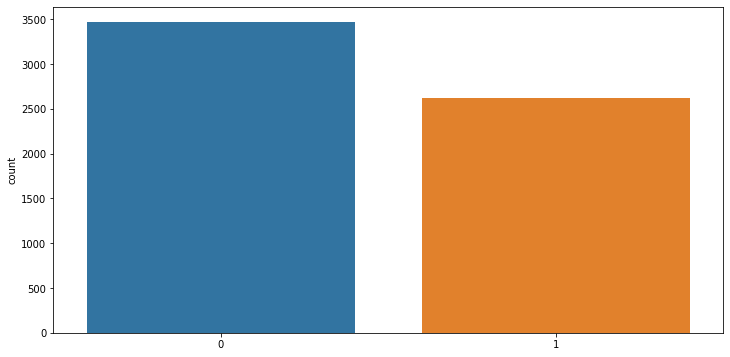

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x=y_train.values,data=y_train)

#### Preprocess dataset

In [ ]:
import re
# Lower case
# Replace urls with a space
# Remove special characters, numbers, punctuation, leading, in-between & trailing whitespaces
def preprocess_text(text):
  text = str(text).lower()
  text = re.sub('(http|ftp|https):\/\/[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?', ' ', text)
  text = re.sub('rt','', text) 
  text = re.sub('#', '', text)
  text = re.sub('[^\w\s]','', text)
  text = re.sub('[^\w\d\s]',' ', text)
  text = re.sub('^\s+|\s+?$', '', text)
  text = re.sub('\s+',' ', text)

  return text

In [ ]:
X_train['text'] = X_train['text'].apply(lambda x:preprocess_text(x))
X_train['text'].head()

4996    courageous and honest analysis of need to use ...
3263    zachzaidman 670thescore wld b a shame if that ...
4907    tell barackobama to rescind medals of honor gi...
2855    worried about how the ca drought might affect ...
4716    youngheroesid lava blast amp power red panther...
Name: text, dtype: object

In [ ]:
# Remove stopwords
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  return ' '.join(term for term in text.split() if term not in stop_words)

In [ ]:
X_train['text'] = X_train['text'].apply(lambda x:remove_stopwords(x))
X_train['text'].head()

4996    courageous honest analysis need use atomic bom...
3263    zachzaidman 670thescore wld b shame golf ca be...
4907    tell barackobama rescind medals honor given us...
2855    worried ca drought might affect extreme weathe...
4716    youngheroesid lava blast amp power red panther...
Name: text, dtype: object

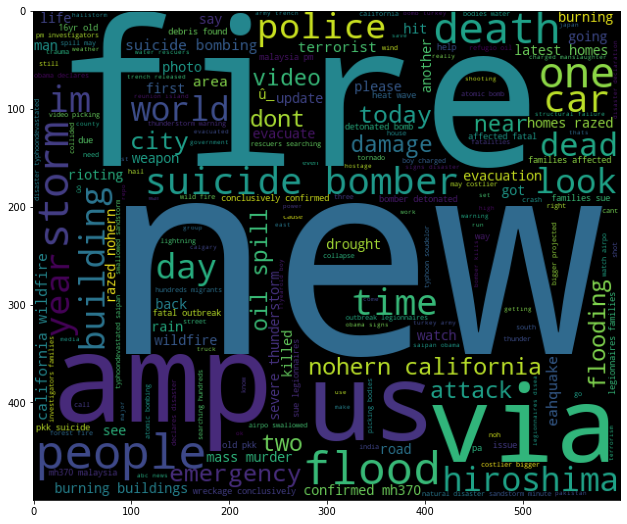

In [ ]:
# Common words for a real disaster
from wordcloud import WordCloud

word_1 = '  '.join(list(X_train[y_train.values==1]['text']))
word_1 = WordCloud(width=600, height=500).generate(word_1)
plt.figure(figsize=(13, 9))
plt.imshow(word_1)
plt.show()

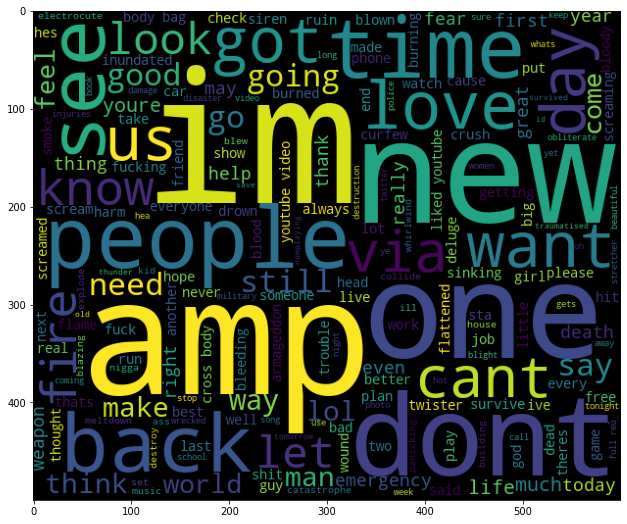

In [ ]:
# Common words for a fake disaster

word_0 = '  '.join(list(X_train[y_train.values==0]['text']))
word_0 = WordCloud(width=600, height=500).generate(word_0)
plt.figure(figsize=(13, 9))
plt.imshow(word_0)
plt.show()

#### Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(X_train.text).toarray()
y = y_train.values

In [ ]:
print(X)
print('=============================')
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 0 1 1]


In [ ]:
X_test, y_test = dataset.get_test_data()

X_test['text'] = X_test['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
X_test['text'] = X_test['text'].str.replace(r'(http|ftp|https):\/\/[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?', ' ')
X_test['text']= X_test['text'].str.replace('rt',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace(r'\d+(\.\d+)?','').str.replace(r'[^\w\d\s]',' ').str.replace(r'^\s+|\s+?$', '').str.replace(r'\s+',' ')

X_test['text'] = X_test['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
X_test['text'].head()

X_test = cv.fit_transform(X_test.text).toarray()
y_test = y_test.values
print(X_test)
print('=============================')
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 1 1 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


#### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)
print('Test Input:')
print(X_test[0])
print('Targets:')
print(y_test[0])

Test Input:
[0 0 0 ... 0 0 0]
Targets:
1


#### Build a baseline model

In [ ]:
column_names = ["model_type", "dataset", "accuracy", "precision", "recall", "f1_score", "confusion_matrix"]

model_tracker = pd.DataFrame(columns = column_names)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay

## initialize empty model
dis_lr = LogisticRegression()

#############################
#### YOUR CODE GOES HERE ####
dis_lr.fit(X, y)  

cur_preds = dis_lr.predict(X)
dis_lr_train_df = pd.DataFrame([['Baseline Logistic Regression', 'train', accuracy_score(y, cur_preds), precision_score(y, cur_preds), recall_score(y, cur_preds), f1_score(y, cur_preds), confusion_matrix(y, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(dis_lr_train_df)

cur_preds = dis_lr.predict(X_dev)
dis_lr_dev_df = pd.DataFrame([['Baseline Logistic Regression', 'dev', accuracy_score(y_dev, cur_preds), precision_score(y_dev, cur_preds), recall_score(y_dev, cur_preds), f1_score(y_dev, cur_preds), confusion_matrix(y_dev, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(dis_lr_dev_df)

cur_preds = dis_lr.predict(X_test)
dis_lr_test_df = pd.DataFrame([['Baseline Logistic Regression', 'test', accuracy_score(y_test, cur_preds), precision_score(y_test, cur_preds), recall_score(y_test, cur_preds), f1_score(y_test, cur_preds), confusion_matrix(y_test, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(dis_lr_test_df)

model_tracker

,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix
0,Baseline Logistic Regression,train,0.869294,0.896612,0.787185,0.838343,"[[3230, 238], [558, 2064]]"
0,Baseline Logistic Regression,dev,0.558476,0.453532,0.392283,0.420690,"[[303, 147], [189, 122]]"
0,Baseline Logistic Regression,test,0.553806,0.496063,0.372781,0.425676,"[[296, 128], [212, 126]]"


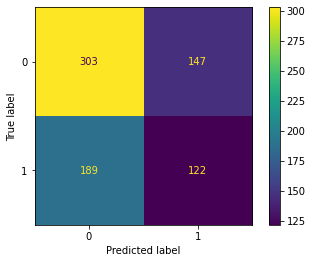

In [ ]:
dis_categories = [0, 1]
ConfusionMatrixDisplay.from_estimator(dis_lr, X_dev, y_dev,display_labels=dis_categories)
plt.show()

#### Improve performance with other nonlinear classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "MLP Classifier",
         "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    MLPClassifier(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)


In [ ]:
for name, model in models:
    model.fit(X,y)

    cur_preds = model.predict(X)
    cur_preds_train_df = pd.DataFrame([[f"{model}", 'train', accuracy_score(y, cur_preds), precision_score(y, cur_preds), recall_score(y, cur_preds), f1_score(y, cur_preds), confusion_matrix(y, cur_preds)]], columns=column_names)
    model_tracker = model_tracker.append(cur_preds_train_df)

    cur_preds = model.predict(X_dev)
    cur_preds_dev_df = pd.DataFrame([[f"{model}", 'dev', accuracy_score(y_dev, cur_preds), precision_score(y_dev, cur_preds), recall_score(y_dev, cur_preds), f1_score(y_dev, cur_preds), confusion_matrix(y_dev, cur_preds)]], columns=column_names)
    model_tracker = model_tracker.append(cur_preds_dev_df)

    cur_preds = model.predict(X_test)
    cur_preds_test_df = pd.DataFrame([[f"{model}", 'test', accuracy_score(y_test, cur_preds), precision_score(y_test, cur_preds), recall_score(y_test, cur_preds), f1_score(y_test, cur_preds), confusion_matrix(y_test, cur_preds)]], columns=column_names)
    model_tracker = model_tracker.append(cur_preds_test_df)

model_tracker


,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix
0,Baseline Logistic Regression,train,0.869294,0.896612,0.787185,0.838343,"[[3230, 238], [558, 2064]]"
0,Baseline Logistic Regression,dev,0.558476,0.453532,0.392283,0.420690,"[[303, 147], [189, 122]]"
0,Baseline Logistic Regression,test,0.553806,0.496063,0.372781,0.425676,"[[296, 128], [212, 126]]"
0,KNeighborsClassifier(),train,0.795731,0.911589,0.581998,0.710428,"[[3320, 148], [1096, 1526]]"
0,KNeighborsClassifier(),dev,0.592641,0.514286,0.057878,0.104046,"[[433, 17], [293, 18]]"
0,KNeighborsClassifier(),test,0.557743,0.508772,0.085799,0.146835,"[[396, 28], [309, 29]]"
0,DecisionTreeClassifier(),train,0.978654,0.991713,0.958429,0.974787,"[[3447, 21], [109, 2513]]"
0,DecisionTreeClassifier(),dev,0.553219,0.447273,0.395498,0.419795,"[[298, 152], [188, 123]]"
0,DecisionTreeClassifier(),test,0.548556,0.489865,0.428994,0.457413,"[[273, 151], [193, 145]]"
0,RandomForestClassifier(),train,0.978654,0.982946,0.967201,0.975010,"[[3424, 44], [86, 2536]]"


Best performing baseline models in descending order according to accuracy on train, dev and test sets:


*   DecisionTreeClassifier()	
*   RandomForestClassifier()	
*   MLPClassifier()	



#### Decison Tree Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=1024)
search_hyperparams = [
    {'criterion':['gini','entropy'], 'max_depth': range(1, 5), 'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.1, .01, .001],}
]

gs_dts = GridSearchCV(estimator=dtc, param_grid = search_hyperparams, scoring='accuracy')
gs_dts.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1024),
             param_grid=[{'ccp_alpha': [0.1, 0.01, 0.001],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 5),
                          'max_features': ['auto', 'sqrt', 'log2']}],
             scoring='accuracy')

In [ ]:
gs_dts.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto'}

In [ ]:
cur_preds = gs_dts.predict(X)
cur_preds_train_df = pd.DataFrame([["Decision Tree Classifier GridSearch", 'train', accuracy_score(y, cur_preds), precision_score(y, cur_preds), recall_score(y, cur_preds), f1_score(y, cur_preds), confusion_matrix(y, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_train_df)

cur_preds = model.predict(X_dev)
cur_preds_dev_df = pd.DataFrame([["Decision Tree Classifier GridSearch", 'dev', accuracy_score(y_dev, cur_preds), precision_score(y_dev, cur_preds), recall_score(y_dev, cur_preds), f1_score(y_dev, cur_preds), confusion_matrix(y_dev, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_dev_df)

cur_preds = model.predict(X_test)
cur_preds_test_df = pd.DataFrame([["Decision Tree Classifier GridSearch", 'test', accuracy_score(y_test, cur_preds), precision_score(y_test, cur_preds), recall_score(y_test, cur_preds), f1_score(y_test, cur_preds), confusion_matrix(y_test, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_test_df)

model_tracker

,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix
0,Baseline Logistic Regression,train,0.869294,0.896612,0.787185,0.838343,"[[3230, 238], [558, 2064]]"
0,Baseline Logistic Regression,dev,0.558476,0.453532,0.392283,0.420690,"[[303, 147], [189, 122]]"
0,Baseline Logistic Regression,test,0.553806,0.496063,0.372781,0.425676,"[[296, 128], [212, 126]]"
0,KNeighborsClassifier(),train,0.795731,0.911589,0.581998,0.710428,"[[3320, 148], [1096, 1526]]"
0,KNeighborsClassifier(),dev,0.592641,0.514286,0.057878,0.104046,"[[433, 17], [293, 18]]"
0,KNeighborsClassifier(),test,0.557743,0.508772,0.085799,0.146835,"[[396, 28], [309, 29]]"
0,DecisionTreeClassifier(),train,0.978654,0.991713,0.958429,0.974787,"[[3447, 21], [109, 2513]]"
0,DecisionTreeClassifier(),dev,0.553219,0.447273,0.395498,0.419795,"[[298, 152], [188, 123]]"
0,DecisionTreeClassifier(),test,0.548556,0.489865,0.428994,0.457413,"[[273, 151], [193, 145]]"
0,RandomForestClassifier(),train,0.978654,0.982946,0.967201,0.975010,"[[3424, 44], [86, 2536]]"


Tuning the Decision Tree Classifier drastically reduces the accuracy on the training set from 0.97 to 0.58

#### Random Forest Tuning


In [ ]:
rfc=RandomForestClassifier(random_state=42)
search_hyperparams = [{
    'n_estimators': [1, 10, 100, 1000],
    'criterion' :['gini', 'entropy']
}]
gs_rfc = GridSearchCV(estimator=rfc, param_grid = search_hyperparams, scoring='accuracy')
gs_rfc.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'n_estimators': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
gs_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 1000}

In [ ]:
cur_preds = gs_rfc.predict(X)
cur_preds_train_df = pd.DataFrame([["Random Forest Classifier GridSearch", 'train', accuracy_score(y, cur_preds), precision_score(y, cur_preds), recall_score(y, cur_preds), f1_score(y, cur_preds), confusion_matrix(y, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_train_df)

cur_preds = gs_rfc.predict(X_dev)
cur_preds_dev_df = pd.DataFrame([["Random Forest Classifier GridSearch", 'dev', accuracy_score(y_dev, cur_preds), precision_score(y_dev, cur_preds), recall_score(y_dev, cur_preds), f1_score(y_dev, cur_preds), confusion_matrix(y_dev, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_dev_df)

cur_preds = gs_rfc.predict(X_test)
cur_preds_test_df = pd.DataFrame([["Random Forest Classifier GridSearch", 'test', accuracy_score(y_test, cur_preds), precision_score(y_test, cur_preds), recall_score(y_test, cur_preds), f1_score(y_test, cur_preds), confusion_matrix(y_test, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_test_df)

model_tracker

,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix
0,Baseline Logistic Regression,train,0.869294,0.896612,0.787185,0.838343,"[[3230, 238], [558, 2064]]"
0,Baseline Logistic Regression,dev,0.558476,0.453532,0.392283,0.420690,"[[303, 147], [189, 122]]"
0,Baseline Logistic Regression,test,0.553806,0.496063,0.372781,0.425676,"[[296, 128], [212, 126]]"
0,KNeighborsClassifier(),train,0.795731,0.911589,0.581998,0.710428,"[[3320, 148], [1096, 1526]]"
0,KNeighborsClassifier(),dev,0.592641,0.514286,0.057878,0.104046,"[[433, 17], [293, 18]]"
0,KNeighborsClassifier(),test,0.557743,0.508772,0.085799,0.146835,"[[396, 28], [309, 29]]"
0,DecisionTreeClassifier(),train,0.978654,0.991713,0.958429,0.974787,"[[3447, 21], [109, 2513]]"
0,DecisionTreeClassifier(),dev,0.553219,0.447273,0.395498,0.419795,"[[298, 152], [188, 123]]"
0,DecisionTreeClassifier(),test,0.548556,0.489865,0.428994,0.457413,"[[273, 151], [193, 145]]"
0,RandomForestClassifier(),train,0.978654,0.982946,0.967201,0.975010,"[[3424, 44], [86, 2536]]"


In [ ]:
mlp=MLPClassifier(random_state=42)
search_hyperparams = [{
    'hidden_layer_sizes': [(10,30,10),(200,)],
    'learning_rate' :['constant', 'adaptive'],
    'solver': ['sgd', 'adam'],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05]

}]
gs_mlp = GridSearchCV(estimator=mlp, param_grid = search_hyperparams, scoring='accuracy')
gs_mlp.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(estimator=MLPClassifier(random_state=42),
             param_grid=[{'activation': ['tanh', 'relu'],
                          'alpha': [0.0001, 0.05],
                          'hidden_layer_sizes': [(10, 30, 10), (200,)],
                          'learning_rate': ['constant', 'adaptive'],
                          'solver': ['sgd', 'adam']}],
             scoring='accuracy')

In [ ]:
gs_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (200,),
 'learning_rate': 'constant',
 'solver': 'sgd'}

In [ ]:
cur_preds = gs_mlp.predict(X)
cur_preds_train_df = pd.DataFrame([["MLPClassifier GridSearch", 'train', accuracy_score(y, cur_preds), precision_score(y, cur_preds), recall_score(y, cur_preds), f1_score(y, cur_preds), confusion_matrix(y, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_train_df)

cur_preds = gs_mlp.predict(X_dev)
cur_preds_dev_df = pd.DataFrame([["MLPClassifier GridSearch", 'dev', accuracy_score(y_dev, cur_preds), precision_score(y_dev, cur_preds), recall_score(y_dev, cur_preds), f1_score(y_dev, cur_preds), confusion_matrix(y_dev, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_dev_df)

cur_preds = gs_mlp.predict(X_test)
cur_preds_test_df = pd.DataFrame([["MLPClassifier GridSearch", 'test', accuracy_score(y_test, cur_preds), precision_score(y_test, cur_preds), recall_score(y_test, cur_preds), f1_score(y_test, cur_preds), confusion_matrix(y_test, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_test_df)

model_tracker

,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix
0,Baseline Logistic Regression,train,0.869294,0.896612,0.787185,0.838343,"[[3230, 238], [558, 2064]]"
0,Baseline Logistic Regression,dev,0.558476,0.453532,0.392283,0.420690,"[[303, 147], [189, 122]]"
0,Baseline Logistic Regression,test,0.553806,0.496063,0.372781,0.425676,"[[296, 128], [212, 126]]"
0,KNeighborsClassifier(),train,0.795731,0.911589,0.581998,0.710428,"[[3320, 148], [1096, 1526]]"
0,KNeighborsClassifier(),dev,0.592641,0.514286,0.057878,0.104046,"[[433, 17], [293, 18]]"
0,KNeighborsClassifier(),test,0.557743,0.508772,0.085799,0.146835,"[[396, 28], [309, 29]]"
0,DecisionTreeClassifier(),train,0.978654,0.991713,0.958429,0.974787,"[[3447, 21], [109, 2513]]"
0,DecisionTreeClassifier(),dev,0.553219,0.447273,0.395498,0.419795,"[[298, 152], [188, 123]]"
0,DecisionTreeClassifier(),test,0.548556,0.489865,0.428994,0.457413,"[[273, 151], [193, 145]]"
0,RandomForestClassifier(),train,0.978654,0.982946,0.967201,0.975010,"[[3424, 44], [86, 2536]]"


#### Ensembling


In [ ]:
from sklearn.ensemble import BaggingClassifier

bgg_ensemble = BaggingClassifier()
bgg_ensemble.fit(X, y)
cur_preds = bgg_ensemble.predict(X)
cur_preds_train_df = pd.DataFrame([["BaggingClassifier Ensemble", 'train', accuracy_score(y, cur_preds), precision_score(y, cur_preds), recall_score(y, cur_preds), f1_score(y, cur_preds), confusion_matrix(y, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_train_df)

cur_preds = bgg_ensemble.predict(X_dev)
cur_preds_dev_df = pd.DataFrame([["BaggingClassifier Ensemble", 'dev', accuracy_score(y_dev, cur_preds), precision_score(y_dev, cur_preds), recall_score(y_dev, cur_preds), f1_score(y_dev, cur_preds), confusion_matrix(y_dev, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_dev_df)

cur_preds = bgg_ensemble.predict(X_test)
cur_preds_test_df = pd.DataFrame([["BaggingClassifier Ensemble", 'test', accuracy_score(y_test, cur_preds), precision_score(y_test, cur_preds), recall_score(y_test, cur_preds), f1_score(y_test, cur_preds), confusion_matrix(y_test, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_test_df)

model_tracker

,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix
0,Baseline Logistic Regression,train,0.869294,0.896612,0.787185,0.838343,"[[3230, 238], [558, 2064]]"
0,Baseline Logistic Regression,dev,0.558476,0.453532,0.392283,0.420690,"[[303, 147], [189, 122]]"
0,Baseline Logistic Regression,test,0.553806,0.496063,0.372781,0.425676,"[[296, 128], [212, 126]]"
0,KNeighborsClassifier(),train,0.795731,0.911589,0.581998,0.710428,"[[3320, 148], [1096, 1526]]"
0,KNeighborsClassifier(),dev,0.592641,0.514286,0.057878,0.104046,"[[433, 17], [293, 18]]"
0,KNeighborsClassifier(),test,0.557743,0.508772,0.085799,0.146835,"[[396, 28], [309, 29]]"
0,DecisionTreeClassifier(),train,0.978654,0.991713,0.958429,0.974787,"[[3447, 21], [109, 2513]]"
0,DecisionTreeClassifier(),dev,0.553219,0.447273,0.395498,0.419795,"[[298, 152], [188, 123]]"
0,DecisionTreeClassifier(),test,0.548556,0.489865,0.428994,0.457413,"[[273, 151], [193, 145]]"
0,RandomForestClassifier(),train,0.978654,0.982946,0.967201,0.975010,"[[3424, 44], [86, 2536]]"


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_ensemble = BaggingClassifier()
gb_ensemble.fit(X, y)
cur_preds = gb_ensemble.predict(X)
cur_preds_train_df = pd.DataFrame([["GradientBoostingClassifier Ensemble", 'train', accuracy_score(y, cur_preds), precision_score(y, cur_preds), recall_score(y, cur_preds), f1_score(y, cur_preds), confusion_matrix(y, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_train_df)

cur_preds = gb_ensemble.predict(X_dev)
cur_preds_dev_df = pd.DataFrame([["GradientBoostingClassifier Ensemble", 'dev', accuracy_score(y_dev, cur_preds), precision_score(y_dev, cur_preds), recall_score(y_dev, cur_preds), f1_score(y_dev, cur_preds), confusion_matrix(y_dev, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_dev_df)

cur_preds = gb_ensemble.predict(X_test)
cur_preds_test_df = pd.DataFrame([["GradientBoostingClassifier Ensemble", 'test', accuracy_score(y_test, cur_preds), precision_score(y_test, cur_preds), recall_score(y_test, cur_preds), f1_score(y_test, cur_preds), confusion_matrix(y_test, cur_preds)]], columns=column_names)
model_tracker = model_tracker.append(cur_preds_test_df)

model_tracker

,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix
0,Baseline Logistic Regression,train,0.869294,0.896612,0.787185,0.838343,"[[3230, 238], [558, 2064]]"
0,Baseline Logistic Regression,dev,0.558476,0.453532,0.392283,0.420690,"[[303, 147], [189, 122]]"
0,Baseline Logistic Regression,test,0.553806,0.496063,0.372781,0.425676,"[[296, 128], [212, 126]]"
0,KNeighborsClassifier(),train,0.795731,0.911589,0.581998,0.710428,"[[3320, 148], [1096, 1526]]"
0,KNeighborsClassifier(),dev,0.592641,0.514286,0.057878,0.104046,"[[433, 17], [293, 18]]"
0,KNeighborsClassifier(),test,0.557743,0.508772,0.085799,0.146835,"[[396, 28], [309, 29]]"
0,DecisionTreeClassifier(),train,0.978654,0.991713,0.958429,0.974787,"[[3447, 21], [109, 2513]]"
0,DecisionTreeClassifier(),dev,0.553219,0.447273,0.395498,0.419795,"[[298, 152], [188, 123]]"
0,DecisionTreeClassifier(),test,0.548556,0.489865,0.428994,0.457413,"[[273, 151], [193, 145]]"
0,RandomForestClassifier(),train,0.978654,0.982946,0.967201,0.975010,"[[3424, 44], [86, 2536]]"


#### Missing Data

In [ ]:
# find which columns have missing values
def find_columns_with_missing_data(dataset):
  isnull = dataset.isnull()
  isnull = isnull.sum(axis=0) > 0
  col_withnull = list(isnull[isnull].keys())
  return col_withnull

col_withnull = find_columns_with_missing_data(X_train)
print(col_withnull)

[]


No columns with missing data in the train set

#### Add Features (Location, Keyword)

In [ ]:
X_train_af, y_train_af = dataset.get_train_data()
print('Raw Input:')
print(X_train_af.head())
print('Targets:')
print(y_train_af.head())


Raw Input:
                                                   text
4996  courageous honest analysis need use atomic bom...
3263  zachzaidman 670thescore wld b shame golf ca be...
4907  tell barackobama rescind medals honor given us...
2855  worried ca drought might affect extreme weathe...
4716  youngheroesid lava blast amp power red panther...
Targets:
4996    1
3263    0
4907    1
2855    1
4716    0
Name: target, dtype: int64


In [ ]:
# Class distribution
y_train_af.value_counts()

0    3468
1    2622
Name: target, dtype: int64

In [ ]:
# Preprocess data
X_train_af['text'] = X_train_af['text'].apply(lambda x:preprocess_text(x))
X_train_af['text'].head()

4996    courageous honest analysis need use atomic bom...
3263    zachzaidman 670thescore wld b shame golf ca be...
4907    tell barackobama rescind medals honor given us...
2855    worried ca drought might affect extreme weathe...
4716    youngheroesid lava blast amp power red panther...
Name: text, dtype: object

In [ ]:
# Remove stopwords
X_train_af['text'] = X_train_af['text'].apply(lambda x : remove_stopwords(x))
X_train_af['text'].head()

4996    courageous honest analysis need use atomic bom...
3263    zachzaidman 670thescore wld b shame golf ca be...
4907    tell barackobama rescind medals honor given us...
2855    worried ca drought might affect extreme weathe...
4716    youngheroesid lava blast amp power red panther...
Name: text, dtype: object

In [ ]:
cv_ = CountVectorizer(max_features = 1500)
X_af = cv.fit_transform(X_train_af.text).toarray()
y_af = y_train_af.values

In [ ]:
print(X_af)
print('=============================')
print(y_af)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 0 1 1]


In [ ]:
X_test_af, y_test_af = dataset.get_test_data()

X_test_af['text'] = X_test_af['text'].apply(lambda x:preprocess_text(x))
X_test_af['text'] = X_test_af['text'].apply(lambda x:remove_stopwords(x))
X_test_af['text'].head()

X_test_af = cv.fit_transform(X_test_af.text).toarray()
y_test_af = y_test_af.values
print(X_test_af)
print('=============================')
print(y_test_af)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 1 1 0]


In [ ]:
X_dev_af, X_test_af, y_dev_af, y_test_af = train_test_split(X_test_af, y_test_af, test_size = 0.5, random_state = 0)
print('Test Input:')
print(X_test_af[0])
print('Targets:')
print(y_test_af[0])

Test Input:
[0 0 0 ... 0 0 0]
Targets:
1


In [88]:
for name, model in models:
    model.fit(X_af,y_af)

    cur_preds = model.predict(X_af)
    cur_preds_train_df = pd.DataFrame([[f"{model}", 'train', accuracy_score(y_af, cur_preds), precision_score(y_af, cur_preds), recall_score(y_af, cur_preds), f1_score(y_af, cur_preds), confusion_matrix(y_af, cur_preds)]], columns=column_names)
    model_tracker = model_tracker.append(cur_preds_train_df)

    cur_preds = model.predict(X_dev_af)
    cur_preds_dev_df = pd.DataFrame([[f"{model}", 'dev', accuracy_score(y_dev_af, cur_preds), precision_score(y_dev_af, cur_preds), recall_score(y_dev_af, cur_preds), f1_score(y_dev_af, cur_preds), confusion_matrix(y_dev_af, cur_preds)]], columns=column_names)
    model_tracker = model_tracker.append(cur_preds_dev_df)

    cur_preds = model.predict(X_test_af)
    cur_preds_test_df = pd.DataFrame([[f"{model}", 'test', accuracy_score(y_test_af, cur_preds), precision_score(y_test_af, cur_preds), recall_score(y_test_af, cur_preds), f1_score(y_test_af, cur_preds), confusion_matrix(y_test_af, cur_preds)]], columns=column_names)
    model_tracker = model_tracker.append(cur_preds_test_df)

model_tracker

,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix
0,Baseline Logistic Regression,train,0.869294,0.896612,0.787185,0.838343,"[[3230, 238], [558, 2064]]"
0,Baseline Logistic Regression,dev,0.558476,0.453532,0.392283,0.420690,"[[303, 147], [189, 122]]"
0,Baseline Logistic Regression,test,0.553806,0.496063,0.372781,0.425676,"[[296, 128], [212, 126]]"
0,KNeighborsClassifier(),train,0.795731,0.911589,0.581998,0.710428,"[[3320, 148], [1096, 1526]]"
0,KNeighborsClassifier(),dev,0.592641,0.514286,0.057878,0.104046,"[[433, 17], [293, 18]]"
0,KNeighborsClassifier(),test,0.557743,0.508772,0.085799,0.146835,"[[396, 28], [309, 29]]"
0,DecisionTreeClassifier(),train,0.978654,0.991713,0.958429,0.974787,"[[3447, 21], [109, 2513]]"
0,DecisionTreeClassifier(),dev,0.553219,0.447273,0.395498,0.419795,"[[298, 152], [188, 123]]"
0,DecisionTreeClassifier(),test,0.548556,0.489865,0.428994,0.457413,"[[273, 151], [193, 145]]"
0,RandomForestClassifier(),train,0.978654,0.982946,0.967201,0.975010,"[[3424, 44], [86, 2536]]"


In [94]:
model_tracker.drop([model_tracker.index[32], model_tracker.index[33], model_tracker.index[34], model_tracker.index[35], model_tracker.index[36], model_tracker.index[37], model_tracker.index[38], model_tracker.index[39], model_tracker.index[40], model_tracker.index[41]])

,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix


In [95]:
model_tracker

,model_type,dataset,accuracy,precision,recall,f1_score,confusion_matrix
0,Baseline Logistic Regression,train,0.869294,0.896612,0.787185,0.838343,"[[3230, 238], [558, 2064]]"
0,Baseline Logistic Regression,dev,0.558476,0.453532,0.392283,0.420690,"[[303, 147], [189, 122]]"
0,Baseline Logistic Regression,test,0.553806,0.496063,0.372781,0.425676,"[[296, 128], [212, 126]]"
0,KNeighborsClassifier(),train,0.795731,0.911589,0.581998,0.710428,"[[3320, 148], [1096, 1526]]"
0,KNeighborsClassifier(),dev,0.592641,0.514286,0.057878,0.104046,"[[433, 17], [293, 18]]"
0,KNeighborsClassifier(),test,0.557743,0.508772,0.085799,0.146835,"[[396, 28], [309, 29]]"
0,DecisionTreeClassifier(),train,0.978654,0.991713,0.958429,0.974787,"[[3447, 21], [109, 2513]]"
0,DecisionTreeClassifier(),dev,0.553219,0.447273,0.395498,0.419795,"[[298, 152], [188, 123]]"
0,DecisionTreeClassifier(),test,0.548556,0.489865,0.428994,0.457413,"[[273, 151], [193, 145]]"
0,RandomForestClassifier(),train,0.978654,0.982946,0.967201,0.975010,"[[3424, 44], [86, 2536]]"


### Google Home Command Classification

[Kaggle link](https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/overview)

Google Home, and similar smart devices, rely on speech models to detect when the user utters commands, like "Hey Google". This dataset contains 65,000 one-second long utterances of 30 different short words, each uttered by thousands of people. The challenge is to build an algorithm to classify spoken commands. 

Below we download a file called `train.7z`. It contains a few informational files and a folder of audio files. The audio folder contains subfolders with 1 second clips of voice commands, with the folder name being the label of the audio clip. The labels you will need to predict are `yes`, `no`, `up`, `down`, `left`, `right`, `on`, `off`, `stop`, `go`. You should ignore all other classes. Unlike the Kaggle challenge, here, you do not need to worry about auxiliary labels and background noise. That being said, you will not be able to directly compare your results to the Kaggle leaderboard given these differences.

We recommend featurizing the audio clips as a first step. Consider computing log mel spectrograms as we did above. 


In [ ]:
!gdown --id 1sfkLsKT8JHPMM1pifQJqefL5elopjFX7
!7z x train.7z

In [ ]:
#############################
#### YOUR CODE GOES HERE ####

#############################

In [ ]:
X_train, y_train = dataset.get_train_data()
print('Raw Input:')
print(X_train[:5])
print('Targets:')
print(y_train[:5])

In [ ]:
#############################
#### YOUR CODE GOES HERE ####


#############################

### Classifying Cats and Dogs

[Kaggle link](https://www.kaggle.com/c/dogs-vs-cats)

Is this an image of a cat or a dog? This training dataset contains 25,000 images of both animals. These are real world images of pets with different camera angles, backgrounds, and quality. In other words, this is a difficult task! The top performing model scores 98.9% but use more sophisticated methods than shown in this notebook. Still, see how well you can do!

In [ ]:
!gdown --id 1ya_pBnNQ72Rw9AG0-6sZNRnt2ds_mBfP
!unzip -q train.zip

In [ ]:
from glob import glob
cat_files = glob('train/cat.*.jpg')
dog_files = glob('train/dog.*.jpg')
print(f'{len(cat_files)} cat photos')
print(f'{len(dog_files)} dog photos')

In [ ]:
import os
import torch
import pandas as pd
from glob import glob
from tqdm import tqdm
from skimage.transform import resize
from skimage.io import imread
from skimage import color

def resize_pipeline(image, target_size):
  # find larger and smaller of height vs width
  shape = list(image.shape)
  larger_size = max(shape[:2])
  smaller_size = min(shape[:2])
  ratio = target_size / smaller_size 
  new_larger_size = int(larger_size * ratio)
  new_size = []
  for size in shape[:2]:
    if size == larger_size:
      new_size.append(new_larger_size)
    else:
      new_size.append(target_size)
  new_size.append(shape[2])
  image = resize(image, tuple(new_size), anti_aliasing=True)
  return image

def center_crop(image, target_size):
  shape = list(image.shape)
  y, x = shape[0], shape[1]
  startx = x //2-(target_size//2)
  starty = y //2-(target_size//2)    
  image = image[
    starty: starty + target_size, 
    startx: startx + target_size, 
    :
  ]
  return image

class CatDogDataset(BaseDataset):
  IMAGE_SIZE = 224

  def _load(self):
    cat_files = glob('train/cat.*.jpg')
    dog_files = glob('train/dog.*.jpg')
    img_files = cat_files + dog_files
    labels = [0] * len(cat_files) + [1] * len(dog_files)

    img_data = []
    pbar = tqdm(total=len(img_files), position=0, leave=True)
    for img_file in img_files:
      image = imread(img_file)
      image = resize_pipeline(image, 64)
      if image.shape[0] < 64 and  image.shape[1] < 64:
        # case 1: the image is already small in both width and height
        image_ = np.zeros((64, 64, 3))
        image_[:image.shape[0], :image.shape[1], :] = image
        image = image_
      elif image.shape[0] < 64:
        # case 2: the image is already in width only
        image_ = np.zeros((64, image.shape[1], 3))
        image_[:image.shape[0], :, :] = image
        image = center_crop(image_, 64)
      elif image.shape[1] < 64:
        # case 3: the image is already in height only
        image_ = np.zeros((image.shape[0], 64, 3))
        image_[:, :image.shape[1], :] = image
        image = center_crop(image_, 64)
      else:
        # case 2: the image is big and needs to be cropped
        image = center_crop(image, 64)
      image = image[np.newaxis, ...]  # n x h x w x c
      img_data.append(image)
      pbar.update()
    pbar.close()

    data = np.concatenate(img_data, axis=0)
    labels = np.array(labels)

    return data, labels


dataset = CatDogDataset()

In [ ]:
X_train, y_train = dataset.get_train_data()
print('Image shape:')
print(X_train[0].shape)
print('Image:')
print(X_train[0])
print('Label:')
print(y_train[0])

In [ ]:
#############################
#### YOUR CODE GOES HERE ####


#############################

## Playground

The main project work for this week is to **achieve the best results you can on the dataset of your choice**! Use this as a chance to explore whatever aspect of ML model development you want to study. Remember to use our course materials and previous projects to outline good development practices, and specific algorithms/models/techniques to try. Always work in build-measure-learn iterations to guide your thinking. 


Your goal is to produce the best model you can on the test set. You may use model-centric and data-centric techniques to improve your modeling approach, training set, and fitting/tuning procedure. Part of the challenge of this assignment is how you will choose to navigate uncertainty and allocate your time to trying different approaches. We provide some scaffolding below for featurization, training, and evaluation. You are free to customize the starter code as you wish, just report results and communicate what you tried below. The teaching staff and your peers can help provide feedback as you work. 

### What did you try?

You are free to consult the internet. All of these datasets are taken from Kaggle and you may draw inspiration from the public solutions online, especially the winning ones. 
- What models did they use? 
- What features did they introduce?
- What was their development cycle like? 

Hint: often ML papers, talks, and blogs bias towards more complex methods because they are interesting to program and think about. In practice, it is often the simple things that make the most difference. As you work through this assignment, consider prioritizing simpler experiments (e.g. adding a nonlinear feature or tuning a hyperparameter) before you explore complex pipelines (e.g. boosting a bagged ensemble). Tools like data augmentation, removing outliers, or feature engineering often make a winning difference in ML competitions where everyone can fit models correctly on a given dataset.

**Keep track of your work**

As you try different techniques, visualize data/results, and try side experiments, keep track of your code and experiments! It's okay to let your work contain models that helped you learn but were replaced in later experiments. Keeping a _research journal_ as you work will help you refer back to what you've tried, what works, and where you can improve further later. Keep track of your work here in case you talk through it with peers or teaching staff.

In [ ]:
# GO FOR IT! 

### Preparing for results discussion

We don't do much in the way of formal grading, but you should prepare some experimental results, explanations of your experiments, and conclusions of your modeling work. Reporting what you tried and the outcomes you observed is a central part of quality ML engineering -- and it's critical for building successful ML systems when collaboration is involved. Here's some results and answers you should have ready when discussing your project:
* What are some baseline methods and their performance on this task?
* What modeling improvements did you try? How did each modeling improvement affect results (show a full results table if you can)
* What is your best result? What combination of modeling/data tricks produced this result?
* Did you perform any ablation or sensitivity experiments to understand which aspects of your best system are most important?
* Error analysis: Have you visualized where your model makes mistakes? (Either in aggregate or with individual mistaken examples)
* What is your current diagnosis of the ML System? Is it high variance/bias? What are your thoughts on current dataset size relative to model capacity / fit?
* What might you try next to improve on this task? Could you improve with more data? More time spent building larger models? Data augmentation or similar techniques? 
* Can you identify cases or types of inputs where the model is likely to make mistakes? Are there gaps in the training set and/or model assumptions which would lead the model to make mistakes or not have sufficient data in certain situations?